<a href="https://colab.research.google.com/github/chrisrichardson/linear-algebra/blob/main/05_Iterative_Solver_CG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required libraries
!pip install pyamg
import pyamg
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00


In [6]:
# Set up a linear problem which is symmetric positive definite (SPD)
n = 50
A = pyamg.gallery.poisson((n, n))
print(A.shape)
b = np.ones(A.shape[1])

(2500, 2500)


### Exercise
Use the cell below to write a Conjugate Gradient Solver. Here is the algorithm:
```
r = b - Ax
p = r
Repeat until done (r.r is small):
  y = Ap
  𝛼 = r.r/p.y
  Add 𝛼p onto x
  R = r.r (save r.r)
  Subtract 𝛼y from r
  Compute β=r.r/R (ratio of new r.r to old r.r)
  p = βp + r
```
You can assume that the initial value for `x` is all zeros.


In [3]:
#@title Solution to exercise

def cg_solve(A, b, x):
  r = b - A @ x
  p = r.copy()
  tol = 1e-15
  rnorm2 = r.dot(r)
  while (rnorm2 > tol):
    y = A @ p
    alpha = rnorm2/p.dot(y)
    x += alpha*p
    r -= alpha*y
    rnorm2_new = r.dot(r)
    beta = rnorm2_new/rnorm2
    rnorm2 = rnorm2_new
    p = beta*p + r

## Test the solver

Run the solver, and plot the output.

In [4]:
x = np.zeros_like(b)
cg_solve(A, b, x)

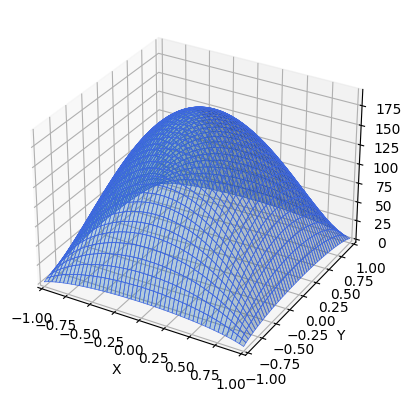

In [5]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y = np.meshgrid(np.linspace(-1, 1, n),
                   np.linspace(-1, 1, n))

# Plot the 3D surface
ax.plot_surface(X, Y, x.reshape((n,n)), edgecolor='royalblue', lw=0.5, alpha=0.3);

ax.set(xlim=(-1, 1), ylim=(-1, 1), zlim=(0, x.max()),
       xlabel='X', ylabel='Y', zlabel='Z');



Update the code to count the number of iterations. To reach machine precision it should take at most `N` iterations, (for an NxN matrix). For this matrix, it will be much less.